In [1]:
from ydata_profiling import ProfileReport
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport
import os

In [2]:
## Load Data
# Type your Loan.csv path
file_path = 'C:/Users/Allen/VSCpr/CS513FinalProject/data/Loan.csv'

# Loading Data
df = pd.read_csv(file_path)
print(df.describe())
df.head()

                Age   AnnualIncome   CreditScore    Experience     LoanAmount  \
count  20000.000000   20000.000000  20000.000000  20000.000000   20000.000000   
mean      39.752600   59161.473550    571.612400     17.522750   24882.867800   
std       11.622713   40350.845168     50.997358     11.316836   13427.421217   
min       18.000000   15000.000000    343.000000      0.000000    3674.000000   
25%       32.000000   31679.000000    540.000000      9.000000   15575.000000   
50%       40.000000   48566.000000    578.000000     17.000000   21914.500000   
75%       48.000000   74391.000000    609.000000     25.000000   30835.000000   
max       80.000000  485341.000000    712.000000     61.000000  184732.000000   

       LoanDuration  NumberOfDependents  MonthlyDebtPayments  \
count  20000.000000        20000.000000         20000.000000   
mean      54.057000            1.517300           454.292700   
std       24.664857            1.386325           240.507609   
min       12.0

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,2018-01-01,45,39948,617,Employed,Master,22,13152,48,Married,...,3329.000000,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0,49.0
1,2018-01-02,38,39709,628,Employed,Associate,15,26045,48,Single,...,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0,52.0
2,2018-01-03,47,40724,570,Employed,Bachelor,26,17627,36,Married,...,3393.666667,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,0,52.0
3,2018-01-04,58,69084,545,Employed,High School,34,37898,96,Single,...,5757.000000,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,0,54.0
4,2018-01-05,37,103264,594,Employed,Associate,17,9184,36,Married,...,8605.333333,0.941369,5,227019,0.197184,0.175990,330.179140,0.070210,1,36.0


In [3]:
# colums value
# UtilityBillsPaymentHistory removed
categorical_columns = [
    'EmploymentStatus',
    'EducationLevel',
    'MaritalStatus',
    'HomeOwnershipStatus',
    'BankruptcyHistory',
    'LoanPurpose',
    'PaymentHistory',
    'LoanApproved'
]

numeric_columns = [
    'Age',
    'AnnualIncome',
    'CreditScore',
    'Experience',
    'LoanAmount',
    'LoanDuration',
    'NumberOfDependents',
    'MonthlyDebtPayments',
    'CreditCardUtilizationRate',
    'NumberOfOpenCreditLines',
    'NumberOfCreditInquiries',
    'DebtToIncomeRatio',
    'PreviousLoanDefaults',
    'LengthOfCreditHistory',
    'SavingsAccountBalance',
    'CheckingAccountBalance',
    'TotalAssets',
    'TotalLiabilities',
    'MonthlyIncome',
    'JobTenure',
    'NetWorth',
    'BaseInterestRate',
    'InterestRate',
    'MonthlyLoanPayment',
    'TotalDebtToIncomeRatio',
    'RiskScore'
]

In [4]:
# Change column types where applicable
# UtilityBillsPaymentHistory removed
# Check and remove 'UtilityBillsPaymentHistory' column if it exists
if 'UtilityBillsPaymentHistory' in df.columns:
    df = df.drop('UtilityBillsPaymentHistory', axis=1)

for col in categorical_columns:
    df[col] = df[col].astype('category')

for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Convert 'ApplicationDate' to datetime
df['ApplicationDate'] = pd.to_datetime(df['ApplicationDate'], errors='coerce')

# Compute the summary statistics for numeric columns
summary = df.head()

# Print the summary
print(summary)

print('\n min, max, mean only')
Min_Max_Mean=df.describe(include=[float, int]).loc[["min", "max", "mean"]]
print(Min_Max_Mean)


  ApplicationDate  Age  AnnualIncome  CreditScore EmploymentStatus  \
0      2018-01-01   45         39948          617         Employed   
1      2018-01-02   38         39709          628         Employed   
2      2018-01-03   47         40724          570         Employed   
3      2018-01-04   58         69084          545         Employed   
4      2018-01-05   37        103264          594         Employed   

  EducationLevel  Experience  LoanAmount  LoanDuration MaritalStatus  ...  \
0         Master          22       13152            48       Married  ...   
1      Associate          15       26045            48        Single  ...   
2       Bachelor          26       17627            36       Married  ...   
3    High School          34       37898            96        Single  ...   
4      Associate          17        9184            36       Married  ...   

   TotalLiabilities MonthlyIncome  JobTenure  NetWorth  BaseInterestRate  \
0             19183   3329.000000       

In [5]:
print(df[df.isna().any(axis=1)]) # show the na in the data frame
missing_values =df.isnull().sum()
print(missing_values)

Empty DataFrame
Columns: [ApplicationDate, Age, AnnualIncome, CreditScore, EmploymentStatus, EducationLevel, Experience, LoanAmount, LoanDuration, MaritalStatus, NumberOfDependents, HomeOwnershipStatus, MonthlyDebtPayments, CreditCardUtilizationRate, NumberOfOpenCreditLines, NumberOfCreditInquiries, DebtToIncomeRatio, BankruptcyHistory, LoanPurpose, PreviousLoanDefaults, PaymentHistory, LengthOfCreditHistory, SavingsAccountBalance, CheckingAccountBalance, TotalAssets, TotalLiabilities, MonthlyIncome, JobTenure, NetWorth, BaseInterestRate, InterestRate, MonthlyLoanPayment, TotalDebtToIncomeRatio, LoanApproved, RiskScore]
Index: []

[0 rows x 35 columns]
ApplicationDate              0
Age                          0
AnnualIncome                 0
CreditScore                  0
EmploymentStatus             0
EducationLevel               0
Experience                   0
LoanAmount                   0
LoanDuration                 0
MaritalStatus                0
NumberOfDependents           

In [6]:
#IV.	Displaying the frequency table of F6 vs Class
## TODO: find which columns need to be crosstab
# freq_table = pd.crosstab(df['F6'], df['Class'])
# print(freq_table)

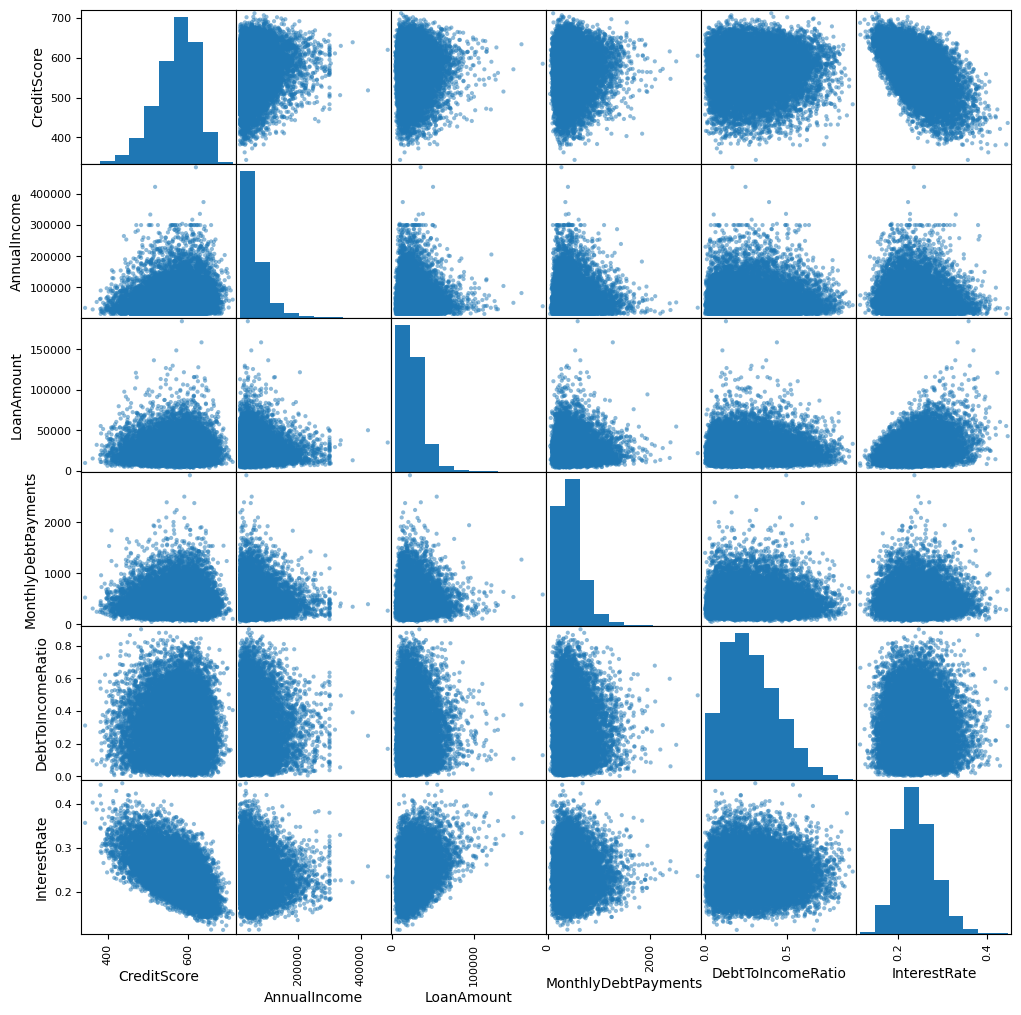

In [12]:
selected_columns = [
    'CreditScore',
    'AnnualIncome',
    'LoanAmount',
    'MonthlyDebtPayments',
    'DebtToIncomeRatio',
    'InterestRate'
]

# Ensure the selected columns are in the DataFrame
missing_cols = [col for col in selected_columns if col not in df.columns]
if missing_cols:
    print(f"The following columns are missing from the DataFrame: {missing_cols}")
else:
    # Create scatter plot matrix
    pd.plotting.scatter_matrix(df[selected_columns], figsize=(12, 12), diagonal='hist')

    # Show plot
    plt.show()

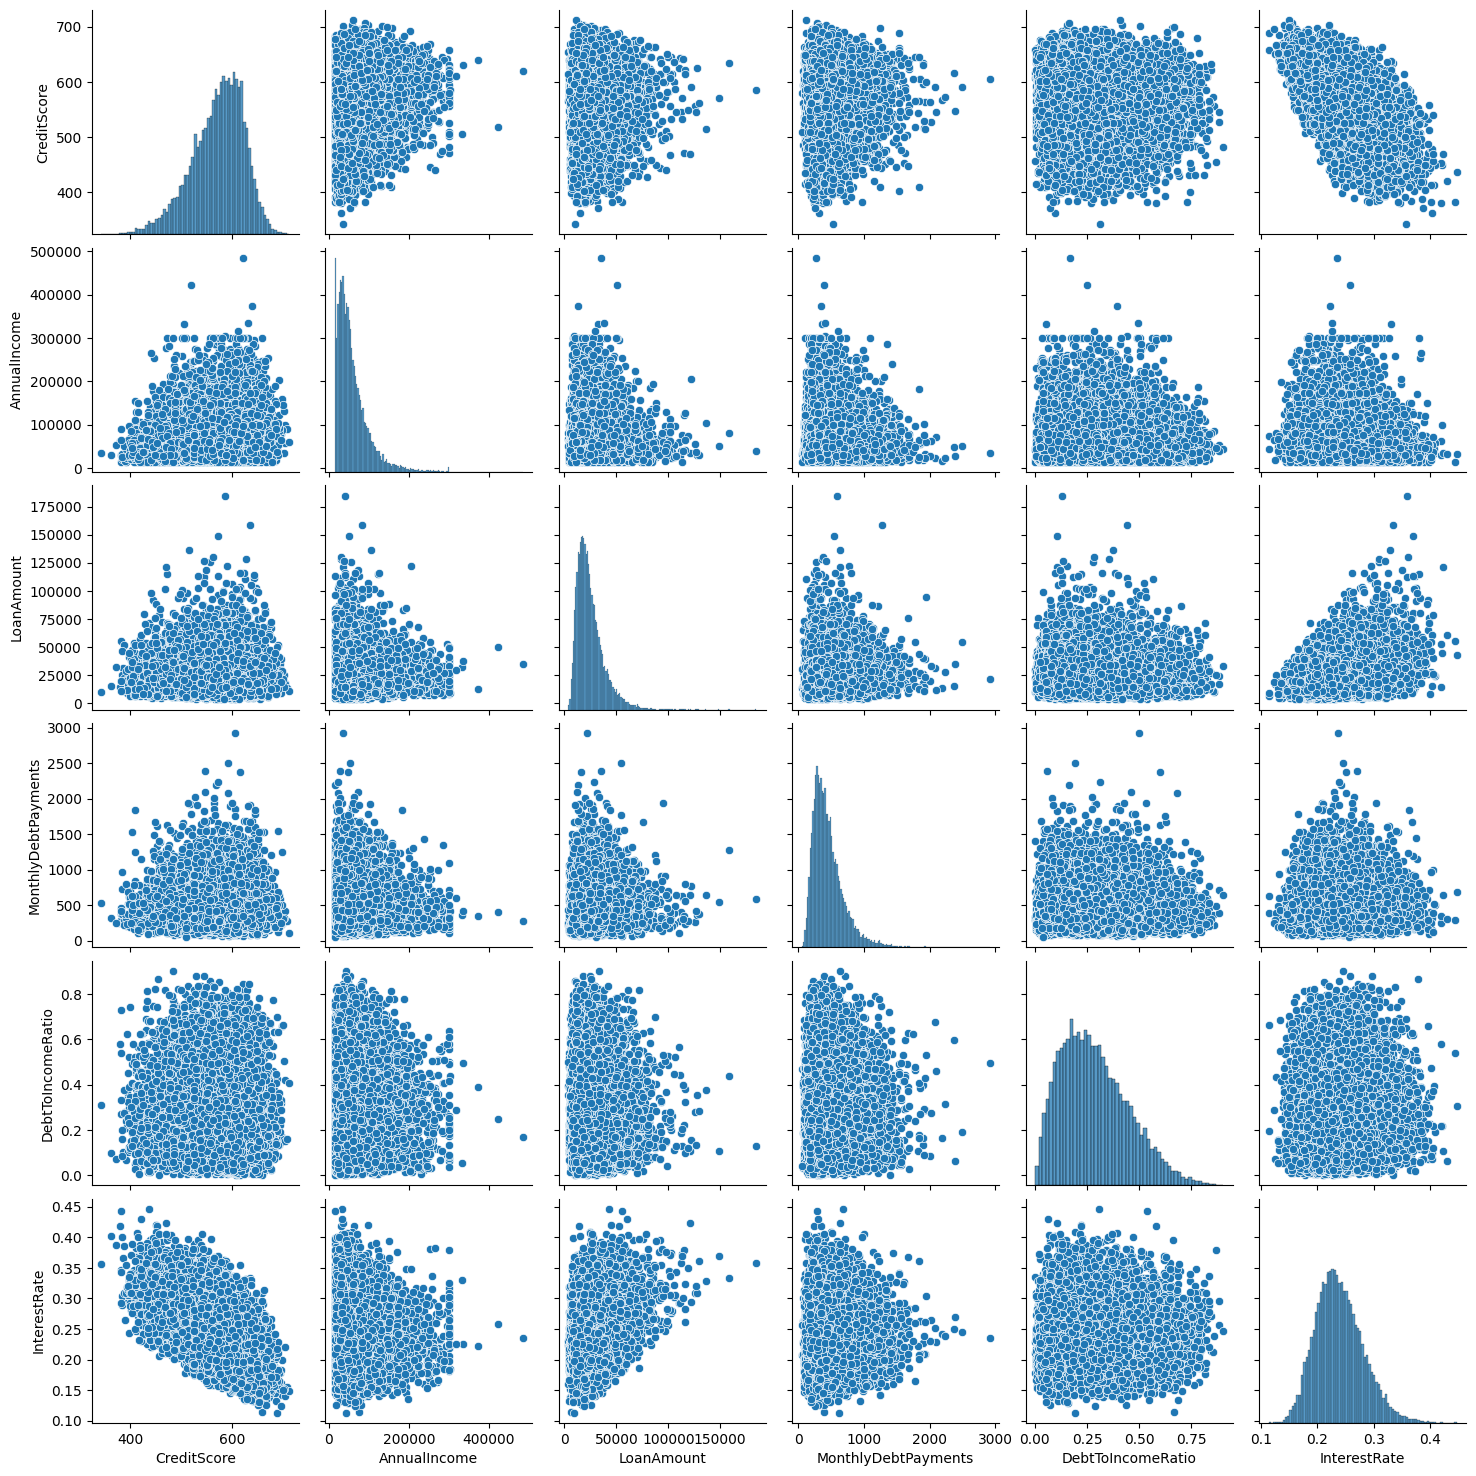

In [13]:
import seaborn as sns
sns.pairplot(df[selected_columns])
plt.show()

Text(0.5, 0, 'Variables')

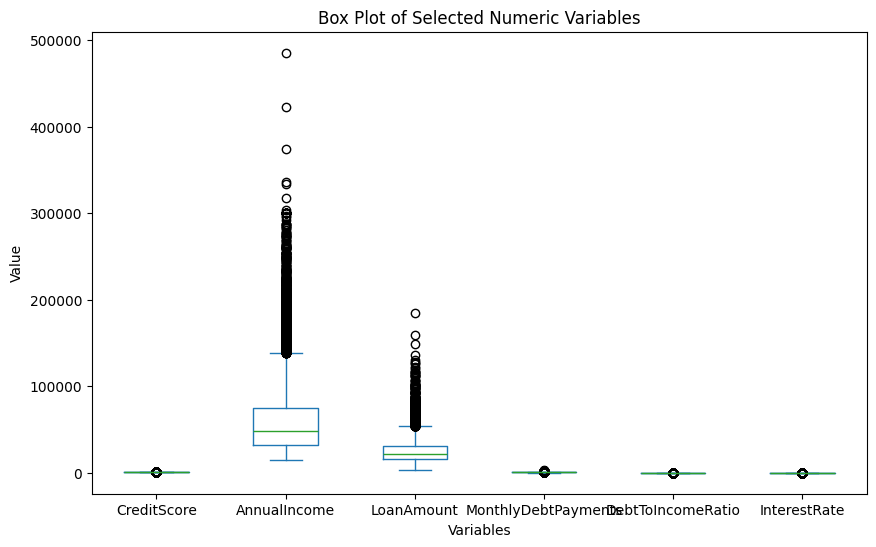

In [15]:
# Create a box plot
subset = df[selected_columns]
# Create the box plot
subset.plot(kind="box", vert=True, figsize=(10, 6))

# Customize plot
plt.title("Box Plot of Selected Numeric Variables", fontsize=12)
plt.ylabel("Value")
plt.xlabel("Variables")

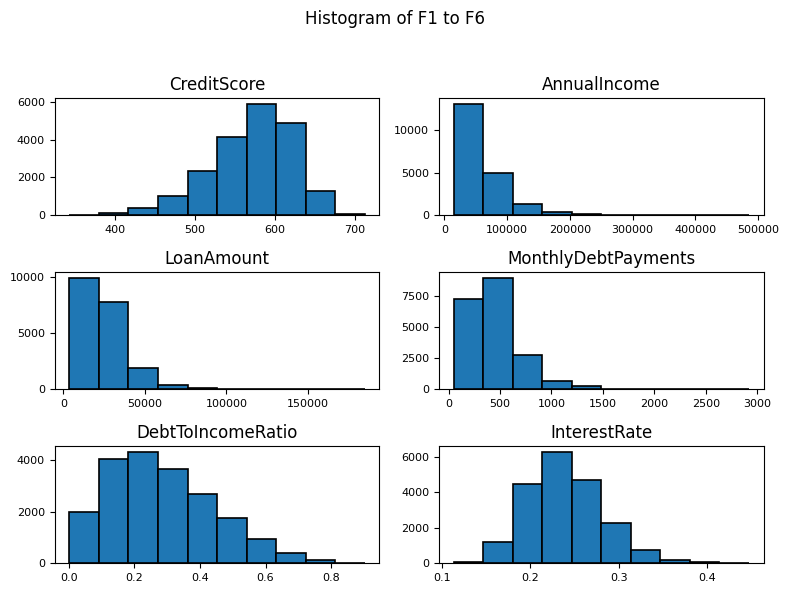

In [16]:
# Create a histogram
subset.hist(grid=False, bins=10, edgecolor="black", linewidth=1.2, xlabelsize=8, ylabelsize=8, figsize=(8, 6))
plt.suptitle("Histogram of F1 to F6", fontsize=12)
plt.tight_layout(rect=(0,0,1,0.95))
plt.show()